In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA


group.png


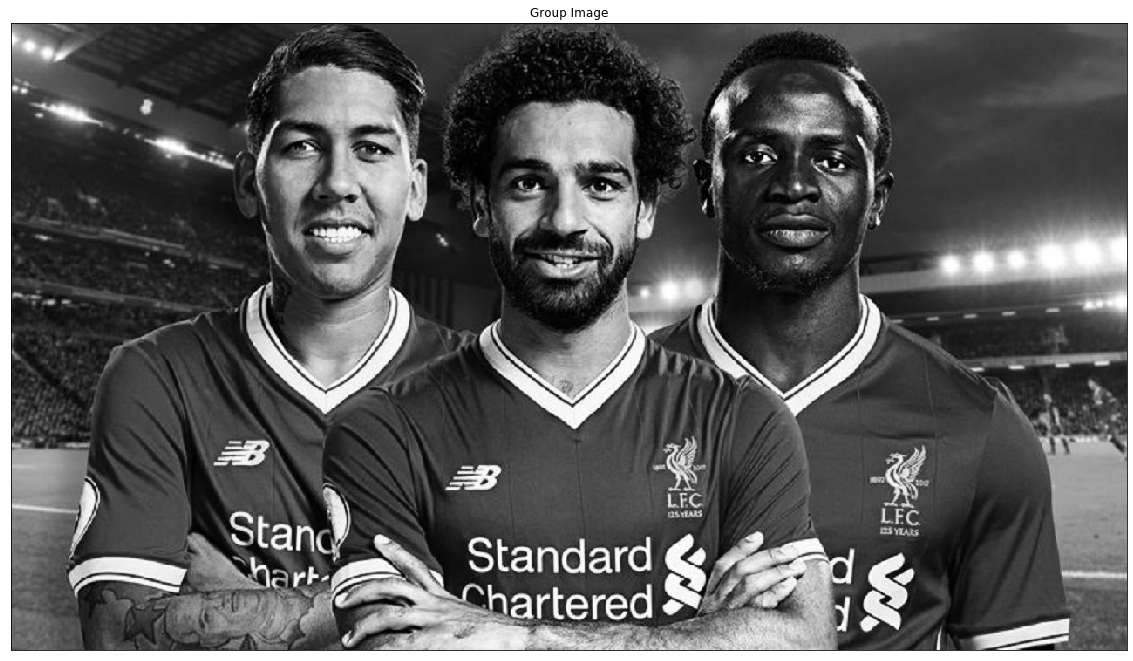

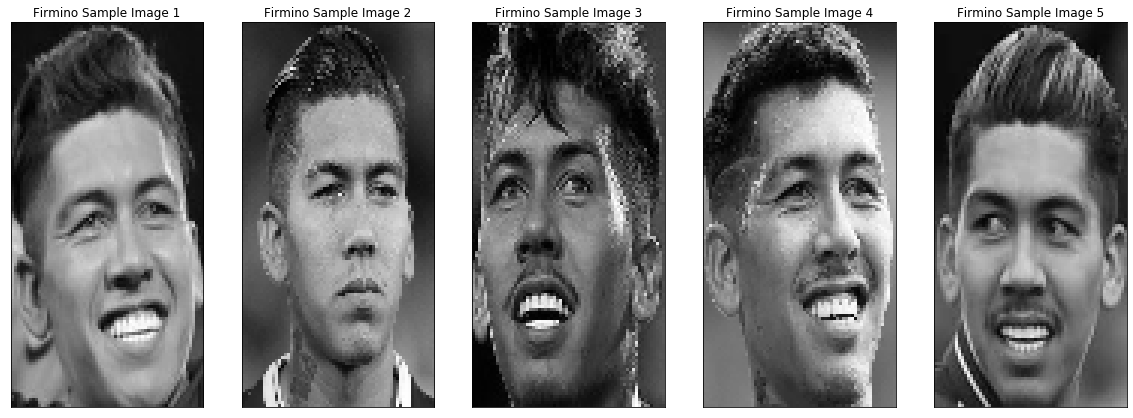

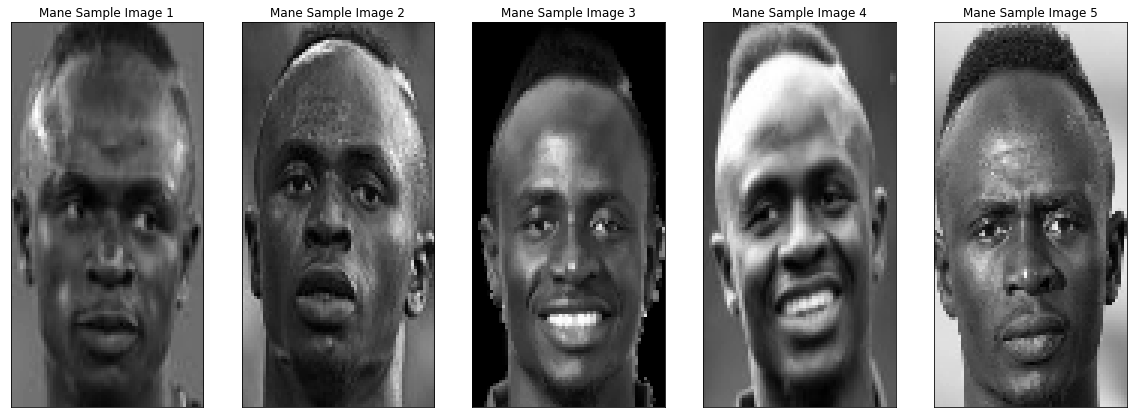

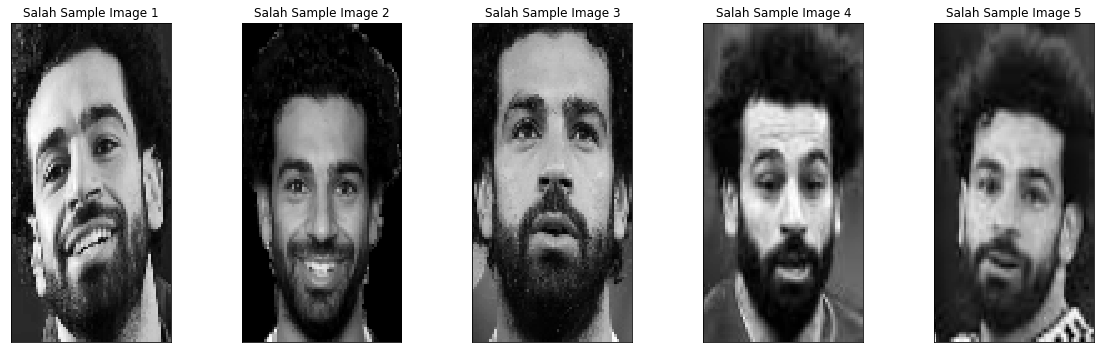

In [2]:
#Setting image_read variables.
categories = {
    0 : "group",
    1 : "firmino",
    2 : "mane",
    3 : "salah",
}
folder = "./data/"

imgs = []       
imgsLabel = []

train_path = './data/group/'
train_classes = os.listdir(train_path)[0]
print(train_classes)
#Reading images
for idx in range(len(categories)):
    imgType = categories[idx] + "/"
    imgPath = os.listdir(folder+imgType)
    
    #Read images in subfolder
    if(idx == 0):
        imgFileName = os.listdir(folder+imgType)[0]
       # print(imgFileName)
        img = cv2.imread(folder+imgType+imgFileName)
        group = img
        groupRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        groupGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        groupGrayUnsigned = groupGray.copy()
        group = group / 255
        groupRGB = groupRGB /255
        groupGray = groupGray/255
        continue
    
    for imgFileName in os.listdir(folder+imgType):
        #print(imgFileName)
        if (imgFileName==".DS_Store"):
            continue
        img = cv2.imread(folder+imgType+imgFileName)
       
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,128))
        img = img/255
        imgsLabel.append(idx)
        imgs.append(img)

imgsLabel = np.asarray(imgsLabel)
#Displaying images
plt.figure(figsize=(20,20))
plt.imshow(groupGray,cmap = "gray")
plt.title("Group Image"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(151)
plt.imshow(imgs[0],cmap = "gray")
plt.title("Firmino Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(152)
plt.imshow(imgs[1],cmap = "gray")
plt.title("Firmino Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(153)
plt.imshow(imgs[2],cmap = "gray")
plt.title("Firmino Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(154)
plt.imshow(imgs[3],cmap = "gray")
plt.title("Firmino Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(155)
plt.imshow(imgs[4],cmap = "gray")
plt.title("Firmino Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(251)
plt.imshow(imgs[10],cmap = "gray")
plt.title("Mane Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(252)
plt.imshow(imgs[11],cmap = "gray")
plt.title("Mane Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(253)
plt.imshow(imgs[12],cmap = "gray")
plt.title("Mane Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(254)
plt.imshow(imgs[13],cmap = "gray")
plt.title("Mane Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(255)
plt.imshow(imgs[14],cmap = "gray")
plt.title("Mane Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(351)
plt.imshow(imgs[20],cmap = "gray")
plt.title("Salah Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(352)
plt.imshow(imgs[21],cmap = "gray")
plt.title("Salah Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(353)
plt.imshow(imgs[22],cmap = "gray")
plt.title("Salah Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(354)
plt.imshow(imgs[23],cmap = "gray")
plt.title("Salah Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(355)
plt.imshow(imgs[24],cmap = "gray")
plt.title("Salah Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
#implement PCA
def pca(dataMat, topNfeat):
    Data=[]
    Data_adj=[]
    LowDimensionMat=[]
    DataAdjusts=[]
    coV=0
    redEigVects=[]
    aatEigVects=[]
    
    for data in dataMat:
        data=np.matrix(data)
        Data.append(data)
        
    meanVals=np.mean(Data,axis=0)
    
    #step 4
    #subtract the mean value from data
    for data in Data:
        DataAdjust=data-meanVals
        DataAdjusts.append(DataAdjust)
        
        DataAdjust_T=np.transpose(DataAdjust)
        coV+=np.dot(DataAdjust_T,DataAdjust)
    covMat=coV/len(Data)
    
    Data_adj=np.array(DataAdjusts)
    
    
    #step6
    #calculate the eigenvalue and eigenvector
    eigVals,eigVects=np.linalg.eig(covMat)
    #calculate the covariance matrix
    #sort the eigenvalues
    eigValInd=eigVals.argsort()[::-1][:topNfeat]
    #eigValInd = eigValInd[:-(topNfeat+1):-1]
    
    #The corresponding eigenvectors
    for i in range(len(eigValInd)):
        redEigVect = eigVects[:,eigValInd[i]]
        redEigVects.append(redEigVect)
    
    
    for eigV in redEigVects:
        aatEig=np.dot(Data_adj,eigV)
        aatEig=np.linalg.norm(aatEig)
        aatEigVects.append(aatEig)
        
    
    #convert the values to the low dimensional space
    for i in range (len(aatEigVects)):
        lowDimensionMat = np.dot(DataAdjusts[i],aatEigVects[i])
        LowDimensionMat.append(lowDimensionMat)
        
    return meanVals, LowDimensionMat

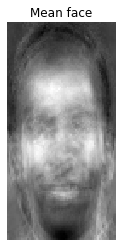

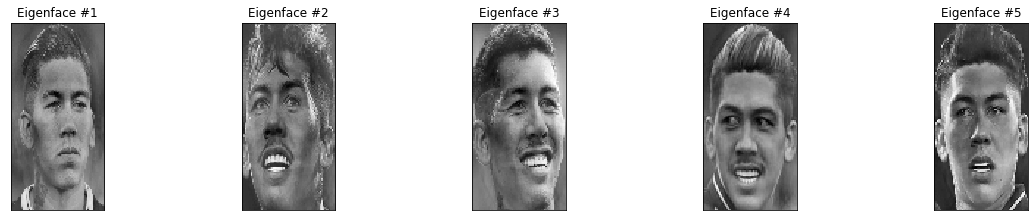

In [4]:
meanVals,LowDimensionMat=pca(imgs,12)

plt.imshow(meanVals,'gray')
plt.title('Mean face'),plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
for i in range (1,6):
    plt.subplot(5,5,i),plt.imshow(LowDimensionMat[i],'gray')
    
    plt.title("Eigenface #" + str(i))
    plt.xticks([]),plt.yticks([])

plt.show()

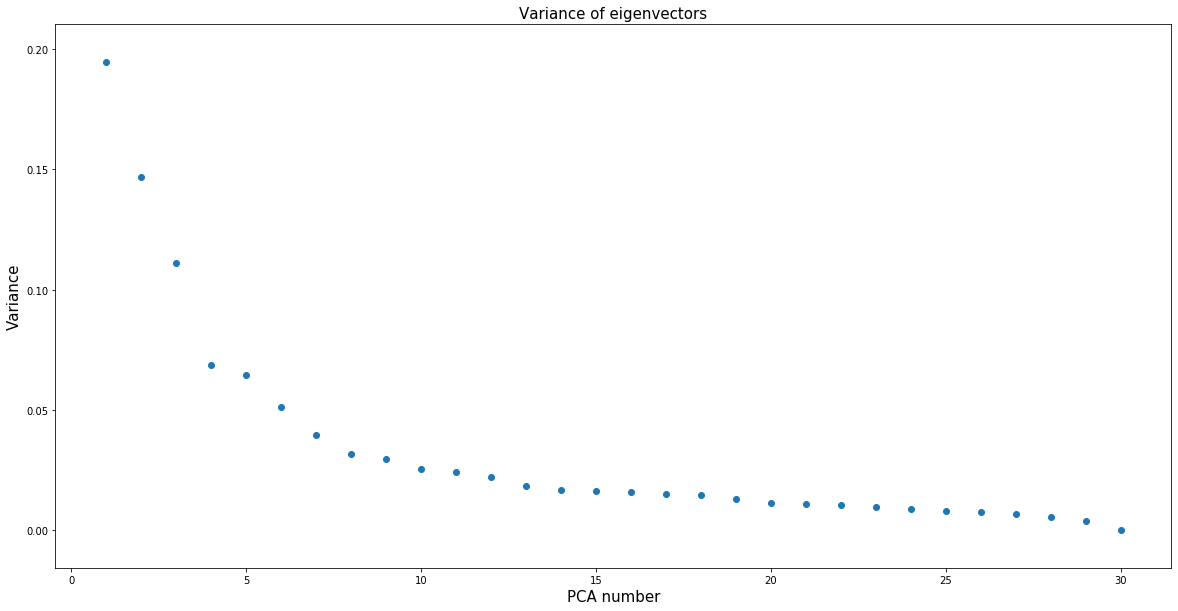

In [5]:
B=imgs.copy()
x_train = np.float64(B)
y_train = np.array(imgsLabel)

x_train = x_train.reshape(x_train.shape[0], -1)

# Compute PCA over range of components
pca_comp = range(1, x_train.shape[0]+1)
variance_ratio = []
for comp in pca_comp:
    pca = PCA(n_components=comp)

    # Compute PCA
    x_train_pca = pca.fit_transform(x_train)
    
    # Get explained variance ratio
    variance_ratio.append(pca.explained_variance_ratio_[-1])

# Plot PCA variance ratio vs number of PCA components
plt.figure(figsize=(20,10))
plt.scatter(pca_comp, variance_ratio)
plt.title('Variance of eigenvectors', fontsize=15)
plt.xlabel('PCA number', fontsize=15)
plt.ylabel('Variance', fontsize=15)

plt.show()

NameError: name 'accuracy' is not defined

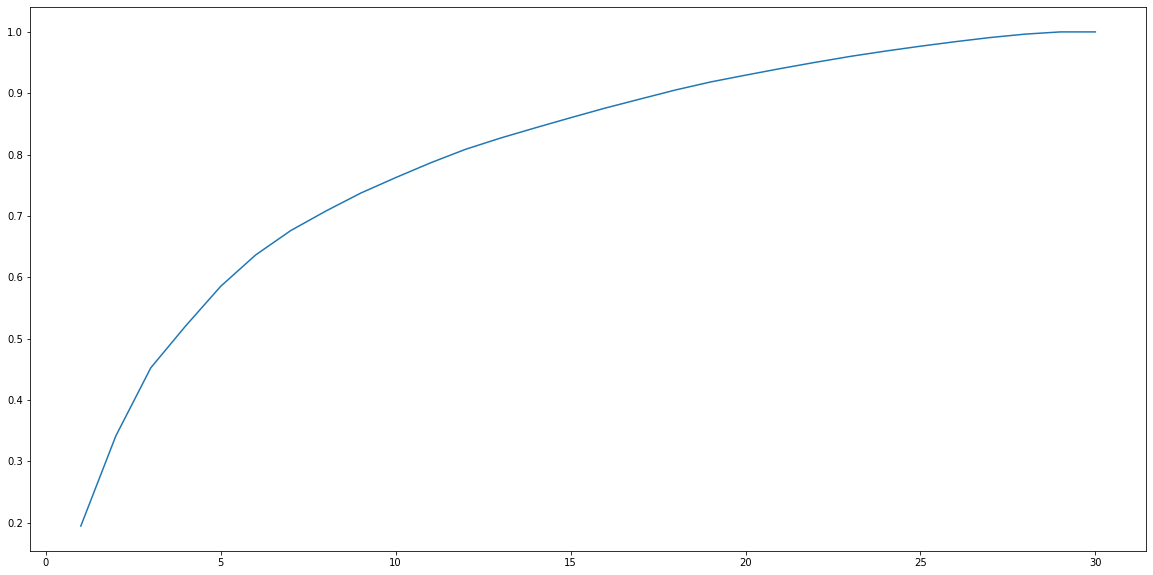

In [6]:
plt.figure(figsize=(20,10))
plt.plot(pca_comp, np.cumsum(variance_ratio))
plt.axhline(y=accuracy, color='g', linestyle='--')
plt.title('Cummulative Variance of PCA Vectors', fontsize=15)
plt.xlabel('Number of PCA Components', fontsize=15)
plt.ylabel('Cummulative Variance Ratio', fontsize=15)

plt.show()



In [7]:
 def L2(imgArr,labels):
    index = 0
    matchedLabels = []
    #compute the label of closest neighbor
    for idxImgA in range(len(imgArr)):
        img = imgArr[idxImgA]
        newArr = imgArr.copy()
        A,B,C = newArr.shape
        newArr = np.append(newArr[:idxImgA], newArr[idxImgA+1:]).reshape((A-1,B,C))
        #compute the distance between images
        distArr = LA.norm(LA.norm((newArr - img),axis=2),axis=1) 
        index = np.argmin(distArr)
        if(index >= idxImgA):
            index += 1
        matchedLabels.append(int(labels[index]))
    return np.asarray(matchedLabels)


def Dist_Arr(img, imgArr):
    distArr = LA.norm(LA.norm((imgArr - img),axis=2),axis=1)
    return np.asarray(distArr)

def toFaceSpace(imgArr):
    imgspca = pca.transform(imgArr)
    eigvect = pca.components_
    reconstructed = np.dot(imgspca,eigvect)
    return reconstructed

In [8]:
#pixelspace
D = imgs.copy()
D = np.asarray(D)
N = D.shape[0]

print("Labels of original images:")
print(imgsLabel,"\n")
print("Labels of closest neighbor in pixel space:")
closestNeighbor = L2(np.array(imgs.copy()),imgsLabel)
print(closestNeighbor)
print("Fraction of data that has a neighbour that is of the same person in pixelspace:", len((closestNeighbor-imgsLabel)[np.where((closestNeighbor-imgsLabel) == 0)]),"/",N)


#Facespace
imgArr = np.asarray(imgs)
N,h,w = imgArr.shape
imgArr = imgArr.reshape((N,h*w))
imgsFaceSpace = toFaceSpace(imgArr)
imgsFaceSpace = np.asarray(imgsFaceSpace.reshape((N,h,w)))
print("\nLabels of closest neighbor in eigenspace:")
closestNeighborFaceSpace= L2(imgsFaceSpace,imgsLabel)
print(closestNeighborFaceSpace)
print("Fraction of data that has a neighbour that is of the same person in eigenspace:", len((closestNeighborFaceSpace-imgsLabel)[np.where((closestNeighborFaceSpace-imgsLabel) == 0)]),"/",N)

Labels of original images:
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3] 

Labels of closest neighbor in pixel space:
[1 1 2 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 3 2 1 3 3 3 2 1 2 3]
Fraction of data that has a neighbour that is of the same person in pixelspace: 23 / 30

Labels of closest neighbor in eigenspace:
[1 1 2 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 3 2 1 3 3 3 2 1 2 3]
Fraction of data that has a neighbour that is of the same person in eigenspace: 23 / 30


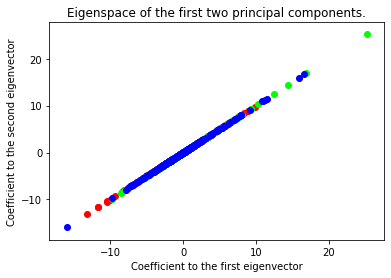

In [9]:

ColorCode = {
    1 : (1.0,0,0),
    2 : (0,1.0,0), 
    3 : (0,0,1.0), 
}
imgPCA = pca.transform(imgArr)
imgPCA1= pca.transform(imgArr)
imgPCA2= pca.transform(imgArr)
for i in range (len(imgPCA)):
    imgPCA1+=imgPCA[i][0]
    imgPCA2+=imgPCA[i][1]
imgPCA1 = np.asarray(imgPCA1)
imgPCA2 = np.asarray(imgPCA2)

for i in range(len(imgPCA)):
    plt.scatter(imgPCA1[i],imgPCA2[i],color = ColorCode[imgsLabel[i]])
plt.title("Eigenspace of the first two principal components.")
plt.xlabel("Coefficient to the first eigenvector"), plt.ylabel("Coefficient to the second eigenvector")
plt.show()


Detect all the faces in the group image.

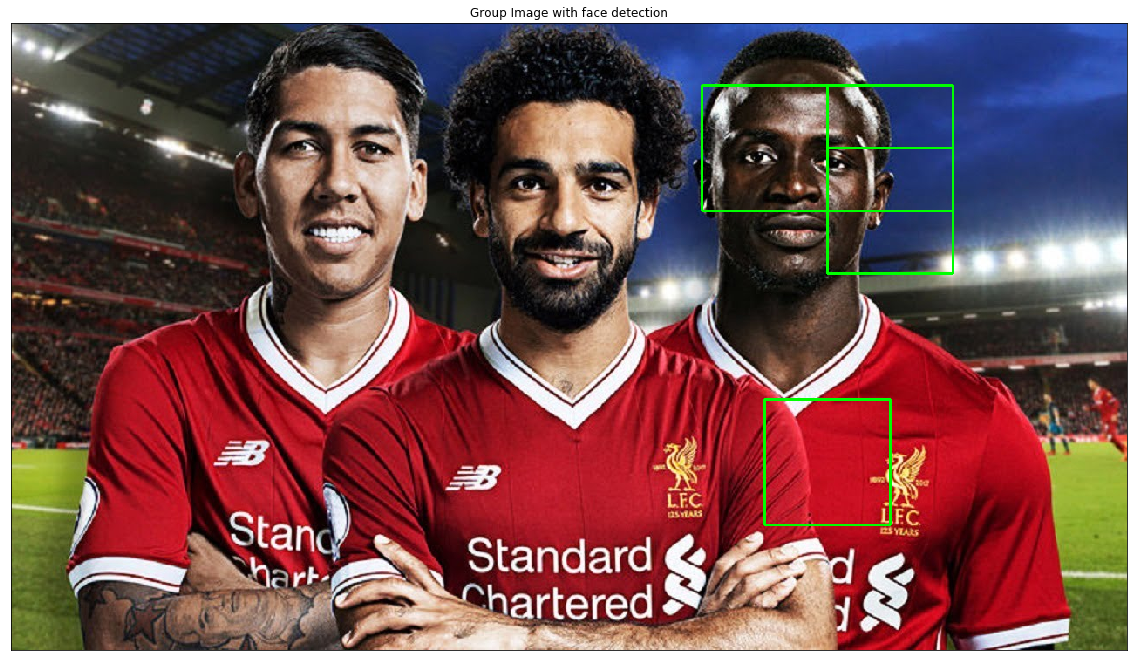

In [10]:
groupDetected = groupRGB.copy()
updated_groupDetected = groupDetected.copy()


class detectface():
    #initialize the attributes of the detectface class
    def __init__(self,x,y,w,h,label,idxX,idxY,faceIdx,distArr):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.label = label
        self.idxX = idxX
        self.idxY = idxY
        self.faceIdx = faceIdx
        self.distArr = distArr
                

#Design parameters for face detection
sliding_window = [80,80] 
pyramidSize = 1
scale =1.8
THRESHOLD = 9


minDist = []
faceArr = []
faceIdx = 0
for z in range(pyramidSize):
    sliding_window = [int(sliding_window[0] * scale),int(sliding_window[1] * scale)] 
    stepSize = int(min(sliding_window[0],sliding_window[1]) // 2)
    idxX=0
    idxY=0
    for y in range(0, group.shape[0], stepSize):
        idxX=0
        idxY+=1
        for x in range(0, group.shape[1], stepSize):
            idxX+=1
            
            
            window = groupGray[y:y + sliding_window[1], x:x + sliding_window[0]]
            if window.shape[0] != sliding_window[1] or window.shape[1] != sliding_window[0]:
                continue
            window = cv2.resize(window,(w,h))              
            
            #Get facespace images
            windowFace = toFaceSpace(window.reshape((w*h))[np.newaxis])
            eigenFacesTemp = imgsFaceSpace.copy()

            
            windowFace = np.array(windowFace)
            eigenFacesTemp = np.array(eigenFacesTemp)

            #compute SSD
            distances = Dist_Arr(windowFace.reshape((1,h,w)),eigenFacesTemp)
            
          
            #print a rectangle when the SSD is lower than the threshold
            if(min(distances) <= THRESHOLD):
                
                Face = detectface(x,y,sliding_window[0],sliding_window[1],imgsLabel[np.argmin(distances)],idxX,idxY,faceIdx,distances)
                faceIdx += 1
                faceArr.append(Face)
                
                
                cv2.rectangle(groupDetected, (x, y), (x + sliding_window[0], y + sliding_window[1]), (0, 1.0, 0), 2)
                cv2.waitKey(1)
            minDist.append(min(distances))
            


plt.figure(figsize=(20,20))
plt.imshow(groupDetected)
plt.title("Group Image with face detection"), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

<Figure size 1080x1080 with 0 Axes>

In [43]:
# function to sweep over an image with a specified window
def slidingWindow(image, step, window):
    
    for y in range(0, image.shape[0], step):
        for x in range(0, image.shape[1], step):
            
            yield (x, y, image[y : y + window[1], x : x + window[0]])

In [48]:
# apply the sliding windows function to the group image and save the windows
windowList = slidingWindow(groupDetected, 100, [128,128])
windows = []

for i in windowList:
    
    w = cv2.resize(i[2], (64, 128),interpolation=cv2.INTER_AREA)
    windows.append(w)
    
dataset = np.array(windows).copy()

# establish experimentally determined thresholds
lowThresh = 6600
threshold = 7400

delta = []
detect = []

# detect faces based on thresholds
for img in dataset:
        norm = np.linalg.norm(img - meanVals, ord=2)
        delta.append(norm)

for j in delta:
        if (lowThresh< j < threshold):
            detect.append(j)
        else: 
            detect.append(0)
            
# save indicies of positively detected faces        
indices = []
    
for k in range(len(detect)):
    if detect[k] != 0:  
        indices.append(k) 

# save detected faces         
detectedFaces = []

for m in indices:
    detectedFaces.append(windows[m])


ValueError: operands could not be broadcast together with shapes (128,64,3) (128,64) 

In [51]:

# draw windows on the group image
image = imgGroup.copy()
temp = image
stepSize = 100
(w, h) = (128, 128)
patch = []

for y in range(0, image.shape[0] , stepSize):
    for x in range(0, image.shape[1], stepSize):
        window = image[x : x + w, y : y + h]
        patch.append(window)
        for p in indices:
            if (len(patch) == p + 1): 
                cv2.rectangle(temp, (x, y), (x + w, y + h), (255, 0, 0), 4)

# show image
print("Group Image with Detected Faces:")        
plt.figure(figsize=(10,10))
plt.imshow(np.array(tmp).astype('uint8'), cmap = 'gray')
plt.axis('off')
plt.show()


NameError: name 'image' is not defined